# Quantitative Finance Model using Donadio and Ghosh Learn Algorithmic Trading Chapter 4 Pairs Correlation Heatmap Example
### David Lowe
### August 23, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the Pairs Correlation Heatmap example found in chapter four of the book Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh. The script seeks to validate the Python environment and package requirements for running these code examples successfully. The eventual goal is to integrate various example code segments from the book into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Sharadar US Equities and Fund Prices from Quandl/Nasdaq Data Link

Source and Further Discussion of the Code Examples: https://github.com/PacktPublishing/Learn-Algorithmic-Trading

# Task 1 - Prepare Environment

## 1.a) Load the required packages and modules

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn
from pandas_datareader import data

## 1.b) Set up the controlling parameters and functions

In [2]:
# Specify the key modeling parameters below
DATA_STORE = '../sharadar.h5'
symbolsIds = ['SPY','AAPL','ADBE','LUV','MSFT','SKYW','QCOM','HPQ','JNPR','AMD','IBM']

MODEL_START_DATE = date(2001, 1, 1)
print("Starting date for the model:", MODEL_START_DATE)

# MODEL_END_DATE = datetime.now().date()
MODEL_END_DATE = date(2017, 12, 31)
print("Ending date for the model:", MODEL_END_DATE)

# Set Pandas dsiplay parameters
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Starting date for the model: 2001-01-01
Ending date for the model: 2017-12-31


# Task 2 - Acquire and Pre-Process Data

In [3]:
def load_financial_data(symbols, start_date, end_date, output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading symbols data')
    except FileNotFoundError:
        print('File not found...downloading the symbols data')
        df = data.DataReader(symbols, 'yahoo', start_date, end_date)
        df.to_pickle(output_file)
    return df

In [4]:
data = load_financial_data(symbolsIds, start_date=MODEL_START_DATE,
                    end_date = MODEL_END_DATE,
                    output_file='multi_data_large.pkl')
print(data.head())

File not found...downloading the symbols data
Attributes  Adj Close                                                                                                                   Close                                                                                                               High                                                                                                           Low                                                                                                            Open                                                                                                            Volume                                                                                                                      
Symbols           SPY      AAPL       ADBE        LUV       MSFT       SKYW       QCOM        HPQ        JNPR      AMD        IBM         SPY      AAPL       ADBE        LUV      MSFT     SKYW      QCOM        HPQ        JNPR      AMD        I

# Task 3 - Set up the Helper Functions for Modeling

In [5]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

# Task 4 - Build Model

In [6]:
pvalues, pairs = find_cointegrated_pairs(data['Adj Close'])
print(pairs)

[('ADBE', 'MSFT'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]


# Task 5 - Evaluate Model Performance

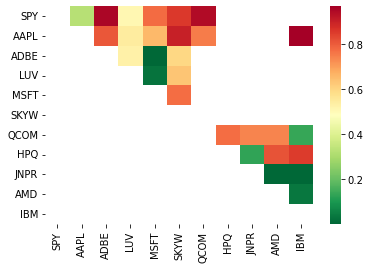

[('ADBE', 'MSFT'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]


In [7]:
seaborn.heatmap(pvalues, xticklabels=symbolsIds,
                yticklabels=symbolsIds, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()
print(pairs)